# 3-sphere: vector fields and left-invariant parallelization

This worksheet demonstrates a few capabilities of
[SageManifolds](http://sagemanifolds.obspm.fr) (version 1.0, as included in SageMath 7.5)
on the example of the 3-dimensional sphere, $\mathbb{S}^3$.

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v1.0/SM_sphere_S3_vectors.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, via the command `sage -n jupyter`

*NB:* a version of SageMath at least equal to 7.5 is required to run this worksheet:

In [1]:
version()

'SageMath version 7.5.1, Release Date: 2017-01-15'

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [2]:
%display latex

We also define a viewer for 3D plots (use `'threejs'` or `'jmol'` for interactive 3D graphics):

In [3]:
viewer3D = 'threejs' # must be 'threejs', jmol', 'tachyon' or None (default)

To increase the computational speed, we ask for demanding computations to be parallelly performed on 8 cores:

In [4]:
Parallelism().set(nproc=8)

## $\mathbb{S}^3$ as a 3-dimensional differentiable manifold

We start by declaring $\mathbb{S}^3$ as a differentiable manifold of dimension 3 over $\mathbb{R}$:

In [5]:
S3 = Manifold(3, 'S^3', latex_name=r'\mathbb{S}^3', start_index=1)

The first argument, `3`, is the dimension of the manifold, while the second argument is the symbol used to label the manifold, with the LaTeX output specified by the argument `latex_name`. The argument `start_index` sets the index range to be used on the manifold for labelling components w.r.t. a basis or a frame: `start_index=1` corresponds to $\{1,2,3\}$; the default value is `start_index=0`, yielding to $\{0,1,2\}$.

In [6]:
print(S3)

3-dimensional differentiable manifold S^3


In [7]:
S3

3-dimensional differentiable manifold S^3

### Coordinate charts on $\mathbb{S}^3$

The 3-sphere cannot be covered by a single chart. At least two charts are necessary, for instance the charts associated with the stereographic projections from two distinct points, $N$ and $S$ say,
which we may call the *North pole* and the *South pole* respectively. Let us introduce the open subsets covered by these two charts: 
$$ U := \mathbb{S}^3\setminus\{N\} $$  
$$ V := \mathbb{S}^3\setminus\{S\} $$

In [8]:
U = S3.open_subset('U') ; print(U)

Open subset U of the 3-dimensional differentiable manifold S^3


In [9]:
V = S3.open_subset('V') ; print(V)

Open subset V of the 3-dimensional differentiable manifold S^3


We declare that $\mathbb{S}^3 = U \cup V$:

In [10]:
S3.declare_union(U, V)

Then we introduce the stereographic chart on $U$, denoting by $(x,y,z)$ the coordinates resulting from the stereographic projection from the North pole onto the equatorial plane:

In [11]:
stereoN.<x,y,z> = U.chart()
stereoN

Chart (U, (x, y, z))

In [12]:
stereoN.coord_range()

x: (-oo, +oo); y: (-oo, +oo); z: (-oo, +oo)

Similarly, we introduce on $V$ the coordinates $(x',y',z')$ corresponding to the stereographic projection from the South pole onto the equatorial plane:

In [13]:
stereoS.<xp,yp,zp> = V.chart("xp:x' yp:y' zp:z'")
stereoS

Chart (V, (xp, yp, zp))

In [14]:
stereoS.coord_range()

xp: (-oo, +oo); yp: (-oo, +oo); zp: (-oo, +oo)

We have to specify the **transition map** between the charts `stereoN` = $(U,(x,y,z))$ and `stereoS` = $(V,(x',y',z'))$; it is given by the standard inversion formulas:

In [15]:
r2 = x^2+y^2+z^2
stereoN_to_S = stereoN.transition_map(stereoS, 
                                      (x/r2, y/r2, z/r2), 
                                      intersection_name='W',
                                      restrictions1= x^2+y^2+z^2!=0, 
                                      restrictions2= xp^2+yp^2+zp^2!=0)
stereoN_to_S.display()

xp = x/(x^2 + y^2 + z^2)
yp = y/(x^2 + y^2 + z^2)
zp = z/(x^2 + y^2 + z^2)

In the above declaration, `'W'` is the name given to the open subset where the two charts overlap: $W := U\cap V$, the condition $x^2+y^2+z^2\not=0$  defines $W$ as a subset of $U$, and the condition $x'^2+y'^2+z'^2\not=0$ defines $W$ as a subset of $V$.

The inverse coordinate transformation is computed by means of the method `inverse()`:

In [16]:
stereoS_to_N = stereoN_to_S.inverse()
stereoS_to_N.display()

x = xp/(xp^2 + yp^2 + zp^2)
y = yp/(xp^2 + yp^2 + zp^2)
z = zp/(xp^2 + yp^2 + zp^2)

Note that the situation is of course perfectly symmetric regarding the coordinates $(x,y,z)$ and $(x',y',z')$.

At this stage, the user's atlas has four charts:

In [17]:
S3.atlas()

[Chart (U, (x, y, z)),
 Chart (V, (xp, yp, zp)),
 Chart (W, (x, y, z)),
 Chart (W, (xp, yp, zp))]

For future reference, we store $W=U\cap V$ into a Python variable:

In [18]:
W = U.intersection(V)
print(W)

Open subset W of the 3-dimensional differentiable manifold S^3


### The North and South poles

$N$ is the point of $V$ of stereographic coordinates $(x',y',z')=(0,0,0)$:

In [19]:
N = V((0,0,0), chart=stereoS, name='N')
print(N)

Point N on the 3-dimensional differentiable manifold S^3


while $S$ is the point of $U$ of stereographic coordinates $(x,y,z)=(0,0,0)$:

In [20]:
S = U((0,0,0), chart=stereoN, name='S')
print(S)

Point S on the 3-dimensional differentiable manifold S^3


We have of course

In [21]:
all([N not in U, N in V, S in U, S not in V])

True

## Embedding of $\mathbb{S}^3$ into $\mathbb{R}^4$

Let us first declare $\mathbb{R}^4$ as a 4-dimensional manifold covered by a single chart (the so-called **Cartesian coordinates**):

In [22]:
R4 = Manifold(4, 'R^4', r'\mathbb{R}^4')
X4.<T,X,Y,Z> = R4.chart()
X4

Chart (R^4, (T, X, Y, Z))

The embedding of $\mathbb{S}^3$ into $\mathbb{R}^4$ is then defined by the standard formulas relating the stereographic coordinates to the ambient Cartesian ones when considering a **stereographic projection** from the point $(-1,0,0,0)$ to the equatorial plane $T=0$:

In [23]:
rp2 = xp^2 + yp^2 + zp^2
Phi = S3.diff_map(R4, {(stereoN, X4): 
                       [(1-r2)/(r2+1), 2*x/(r2+1), 
                        2*y/(r2+1), 2*z/(r2+1)],
                       (stereoS, X4):
                       [(rp2-1)/(rp2+1), 2*xp/(rp2+1), 
                        2*yp/(rp2+1), 2*zp/(rp2+1)]},
                  name='Phi', latex_name=r'\Phi')
Phi.display()

Phi: S^3 --> R^4
on U: (x, y, z) |--> (T, X, Y, Z) = (-(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 + 1), 2*x/(x^2 + y^2 + z^2 + 1), 2*y/(x^2 + y^2 + z^2 + 1), 2*z/(x^2 + y^2 + z^2 + 1))
on V: (xp, yp, zp) |--> (T, X, Y, Z) = ((xp^2 + yp^2 + zp^2 - 1)/(xp^2 + yp^2 + zp^2 + 1), 2*xp/(xp^2 + yp^2 + zp^2 + 1), 2*yp/(xp^2 + yp^2 + zp^2 + 1), 2*zp/(xp^2 + yp^2 + zp^2 + 1))

With this choice of stereographic projection, the "North" pole is actually the point of coordinates $(-1,0,0,0)$ in $\mathbb{R}^4$:

In [24]:
X4(Phi(N))

(-1, 0, 0, 0)

while the "South" pole is the point of coordinates $(1,0,0,0)$:

In [25]:
X4(Phi(S))

(1, 0, 0, 0)

## Hyperspherical coordinates

The hyperspherical coordinates $(\chi, \theta, \phi)$ generalize the standard spherical coordinates $(\theta, \phi)$ on $\mathbb{S}^2$. They are defined on the open domain $A\subset W \subset \mathbb{S}^3$ that is the complement of the "origin meridian"; since the latter is defined by $y=0$ and $x\geq 0$, we declare:

In [26]:
A = W.open_subset('A', coord_def={stereoN.restrict(W): (y!=0, x<0), 
                                  stereoS.restrict(W): (yp!=0, xp<0)})
print(A)

Open subset A of the 3-dimensional differentiable manifold S^3


We then declare the chart $(A,(\chi,\theta,\phi))$ by specifying the intervals spanned by the various coordinates:

In [27]:
spher.<ch,th,ph> = A.chart(r'ch:(0,pi):\chi th:(0,pi):\theta ph:(0,2*pi):\phi')
spher

Chart (A, (ch, th, ph))

In [28]:
spher.coord_range()

ch: (0, pi); th: (0, pi); ph: (0, 2*pi)

The specification of the hyperspherical coordinates is completed by providing the transition map to the stereographic chart $(A,(x,y,z))$:

In [29]:
den = 1 + cos(ch)
spher_to_stereoN = spher.transition_map(stereoN.restrict(A), 
                                        (sin(ch)*sin(th)*cos(ph)/den,
                                         sin(ch)*sin(th)*sin(ph)/den,
                                         sin(ch)*cos(th)/den))
spher_to_stereoN.display()

x = cos(ph)*sin(ch)*sin(th)/(cos(ch) + 1)
y = sin(ch)*sin(ph)*sin(th)/(cos(ch) + 1)
z = cos(th)*sin(ch)/(cos(ch) + 1)

We also provide the inverse transition map, asking to check that the provided formulas are indeed correct (argument `verbose=True`):

In [30]:
spher_to_stereoN.set_inverse(2*atan(sqrt(x^2+y^2+z^2)),
                             atan2(sqrt(x^2+y^2), z),
                             atan2(-y, -x)+pi,
                             verbose=True)

Check of the inverse coordinate transformation:
  ch == 2*arctan(sqrt(-cos(ch) + 1)/sqrt(cos(ch) + 1))
  th == arctan2(sqrt(-cos(ch) + 1)*sin(th)/sqrt(cos(ch) + 1), cos(th)*sin(ch)/(cos(ch) + 1))
  ph == pi - arctan2(sin(ch)*sin(ph)*sin(th)/(cos(ch) + 1), -cos(ph)*sin(ch)*sin(th)/(cos(ch) + 1))
  x == x
  y == y
  z == z


The check is passed, modulo some lack of trigonometric simplifications in the first three lines.

In [31]:
spher_to_stereoN.inverse().display()

ch = 2*arctan(sqrt(x^2 + y^2 + z^2))
th = arctan2(sqrt(x^2 + y^2), z)
ph = pi + arctan2(-y, -x)

The transition map $(A,(\chi,\theta,\phi))\rightarrow (A,(x',y',z'))$ is obtained by combining the transition maps $(A,(\chi,\theta,\phi))\rightarrow (A,(x,y,z))$ and $(A,(x,y,z))\rightarrow (A,(x',y',z'))$:

In [32]:
spher_to_stereoS = stereoN_to_S.restrict(A) * spher_to_stereoN
spher_to_stereoS.display()

xp = (cos(ch) + 1)*cos(ph)*sin(th)/sin(ch)
yp = (cos(ch) + 1)*sin(ph)*sin(th)/sin(ch)
zp = (cos(ch) + 1)*cos(th)/sin(ch)

Similarly, the transition map $(A,(x',y',z'))\rightarrow (A,(\chi,\theta,\phi))$ is obtained by combining the transition maps $(A,(x',y',z'))\rightarrow (A,(x,y,z))$ and $(A,(x,y,z))\rightarrow (A,(\chi,\theta,\phi))$:

In [33]:
stereoS_to_spher = spher_to_stereoN.inverse() * stereoS_to_N.restrict(A)
stereoS_to_spher.display()

ch = 2*arctan(1/sqrt(xp^2 + yp^2 + zp^2))
th = arctan2(sqrt(xp^2 + yp^2)/(xp^2 + yp^2 + zp^2), zp/(xp^2 + yp^2 + zp^2))
ph = pi - arctan2(yp/(xp^2 + yp^2 + zp^2), -xp/(xp^2 + yp^2 + zp^2))

At this stage, the user atlas of $\mathbb{S}^3$ is

In [34]:
S3.atlas()

[Chart (U, (x, y, z)),
 Chart (V, (xp, yp, zp)),
 Chart (W, (x, y, z)),
 Chart (W, (xp, yp, zp)),
 Chart (A, (xp, yp, zp)),
 Chart (A, (x, y, z)),
 Chart (A, (ch, th, ph))]

Let us get the coordinate expression of the restriction of the embedding $\Phi$ to $A$:

In [35]:
Phi.display(stereoN.restrict(A), X4)

Phi: S^3 --> R^4
on A: (x, y, z) |--> (T, X, Y, Z) = (-(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 + 1), 2*x/(x^2 + y^2 + z^2 + 1), 2*y/(x^2 + y^2 + z^2 + 1), 2*z/(x^2 + y^2 + z^2 + 1))

In [36]:
Phi.display(spher, X4)

Phi: S^3 --> R^4
on A: (ch, th, ph) |--> (T, X, Y, Z) = (cos(ch), cos(ph)*sin(ch)*sin(th), sin(ch)*sin(ph)*sin(th), cos(th)*sin(ch))

In [37]:
Phi.display()

Phi: S^3 --> R^4
on U: (x, y, z) |--> (T, X, Y, Z) = (-(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 + 1), 2*x/(x^2 + y^2 + z^2 + 1), 2*y/(x^2 + y^2 + z^2 + 1), 2*z/(x^2 + y^2 + z^2 + 1))
on V: (xp, yp, zp) |--> (T, X, Y, Z) = ((xp^2 + yp^2 + zp^2 - 1)/(xp^2 + yp^2 + zp^2 + 1), 2*xp/(xp^2 + yp^2 + zp^2 + 1), 2*yp/(xp^2 + yp^2 + zp^2 + 1), 2*zp/(xp^2 + yp^2 + zp^2 + 1))
on A: (ch, th, ph) |--> (T, X, Y, Z) = (cos(ch), cos(ph)*sin(ch)*sin(th), sin(ch)*sin(ph)*sin(th), cos(th)*sin(ch))

## Projections from $\mathbb{R}^4$ to $\mathbb{S}^3$

We will need some projection operators from (a subset of) $\mathbb{R}^4$ to $\mathbb{S}^3$.

First, let $\mathbb{R}^4_N$ be $\mathbb{R}^4$ minus the hyperplane $T=-1$:

In [38]:
R4N = R4.open_subset('R4N', latex_name=r'\mathbb{R}^4_N', 
                     coord_def={X4: T!=-1})
X4N = X4.restrict(R4N)

and let us consider the following projection $\Pi_N: \mathbb{R}^4_N \to U\subset\mathbb{S}^3$:

In [39]:
ProjN = R4N.diff_map(U, {(X4N, stereoN): 
                         [X/(1+T), Y/(1+T), Z/(1+T)]},
                     name='P_N', latex_name=r'\Pi_N')
ProjN.display()

P_N: R4N --> U
   (T, X, Y, Z) |--> (x, y, z) = (X/(T + 1), Y/(T + 1), Z/(T + 1))

Similarly, let $\mathbb{R}^4_S$ be $\mathbb{R}^4$ minus the hyperplane $T=1$ and $\Pi_S$ the 
following projection $\mathbb{R}_S\to V\subset \mathbb{S}^3$:

In [40]:
R4S = R4.open_subset('R4S', latex_name=r'\mathbb{R}^4_S', 
                     coord_def={X4: T!=1})
X4S = X4.restrict(R4S)

In [41]:
ProjS = R4S.diff_map(V, {(X4S, stereoS): 
                         [X/(1-T), Y/(1-T), Z/(1-T)]},
                     name='P_S', latex_name=r'\Pi_S')
ProjS.display()

P_S: R4S --> V
   (T, X, Y, Z) |--> (xp, yp, zp) = (-X/(T - 1), -Y/(T - 1), -Z/(T - 1))

Let us check that once applied to an embedded point of $U\cap V\subset \mathbb{S}^3$, this projection reduces to the identity:

In [42]:
var('a b c', domain='real')
p = S3((1+a^2,b,c), chart=stereoN)
stereoN(p)

(a^2 + 1, b, c)

In [43]:
all([p in U, p in V])

True

In [44]:
all([ProjN(Phi(p)) == p, ProjS(Phi(p)) == p])

True

In [45]:
p = S3((1+a^2,b,c), chart=stereoS)
all([ProjN(Phi(p)) == p, ProjS(Phi(p)) == p])

True

In [46]:
q = R4((sqrt(3)/2, sin(a)*cos(b)/2, sin(a)*sin(b)/2, cos(a)/2))
X4(q)

(1/2*sqrt(3), 1/2*cos(b)*sin(a), 1/2*sin(a)*sin(b), 1/2*cos(a))

In [47]:
all([q in R4N, q in R4S])

True

In [48]:
all([Phi(ProjN(q)) == q, Phi(ProjS(q)) == q])

True

## Quaternions

We consider the (division) algebra of quaternions $\mathbb{H}$ as $\mathbb{R}^4$ endowed with the following (non-commutative) product:

In [49]:
def qprod(p,q):
    if p in R4 and q in R4:
        T1, X1, Y1, Z1 = X4(p)
        T2, X2, Y2, Z2 = X4(q)
        return R4(((T1*T2-X1*X2-Y1*Y2-Z1*Z2).simplify_full(),
                   (T1*X2+X1*T2+Y1*Z2-Z1*Y2).simplify_full(),
                   (T1*Y2-X1*Z2+Y1*T2+Z1*X2).simplify_full(),
                   (T1*Z2+X1*Y2-Y1*X2+Z1*T2).simplify_full()))
    if p in S3 and q in S3:
        a = qprod(Phi(p),Phi(q))
        if X4(a) == (-1,0,0,0):
            return N
        return ProjN(R4N(a))
    raise ValueError("Cannot evaluate qprod of {} and {}".format(p,q))

Note that we have extended the definition of the quaternionic product to $\mathbb{S}^3$ via the embedding $\Phi$. 

### Distinguished quaternions on $\mathbb{S}^3$

Let us introduce two special points on $\mathbb{S}^3$: $\mathbf{1}$ and $-\mathbf{1}$.

In [50]:
One = S3((0,0,0), chart=stereoN, name='1', latex_name=r'\mathbf{1}')
X4(Phi(One))

(1, 0, 0, 0)

As we can see from the Cartesian coordinates of $\Phi(\mathbf{1})$, the point $\mathbf{1}$ is actually nothing but the "South" pole used to define the stereographic chart $(V,(x',y',z'))$:

In [51]:
One == S

True

In [52]:
minusOne = S3((0,0,0), chart=stereoS, name='-1', latex_name=r'-\mathbf{1}')
X4(Phi(minusOne))

(-1, 0, 0, 0)

The point $\mathbf{-1}$ is thus nothing but the "North" pole used to define the stereographic chart $(U,(x,y,z))$:

In [53]:
minusOne == N

True

Next we introduce the points $\mathbf{i}$, $\mathbf{j}$ and $\mathbf{k}$ on $\mathbb{S}^3$:

In [54]:
I = S3((1,0,0), chart=stereoN, name='i', latex_name=r'\mathbf{i}')
X4(Phi(I))

(0, 1, 0, 0)

In [55]:
stereoS(I)

(1, 0, 0)

In [56]:
J = S3((0,1,0), chart=stereoN, name='j', latex_name=r'\mathbf{j}')
X4(Phi(J))

(0, 0, 1, 0)

In [57]:
stereoS(J)

(0, 1, 0)

Since $\mathbf{j}$ lies in $A$, contrary to $\mathbf{i}$, we may ask for its hyperspherical coordinates:

In [58]:
spher(J)

(1/2*pi, 1/2*pi, 1/2*pi)

In [59]:
K = S3((0,0,1), chart=stereoN, name='k', latex_name=r'\mathbf{k}')
X4(Phi(K))

(0, 0, 0, 1)

In [60]:
stereoS(K)

(0, 0, 1)

Hamilton's fundamental relations
$$ \mathbf{i} \mathbf{j} \mathbf{k} = \mathbf{-1} $$
$$ \mathbf{i} \mathbf{j} = \mathbf{k},\quad \mathbf{j} \mathbf{k} = \mathbf{i}, \quad \mathbf{k} \mathbf{i} = \mathbf{j}$$
are satisfied:

In [61]:
qprod(I, qprod(J,K)) == minusOne

True

In [62]:
all([qprod(I,J) == K, qprod(J,K) == I,
     qprod(K,I) == J])

True

These relations imply $\mathbf{i}^2 = \mathbf{-1}$, $\mathbf{j}^2 = \mathbf{-1}$ and $\mathbf{k}^2 = \mathbf{-1}$:

In [63]:
all([qprod(One,One) == One, qprod(I,I) == minusOne,
     qprod(J,J) == minusOne, qprod(K,K) == minusOne])

True

Let us introduce $\mathbf{-i}$, $\mathbf{-j}$ and $\mathbf{-k}$, as points of $\mathbb{S}^3$:

In [64]:
minusI = qprod(minusOne, I)
X4(Phi(minusI))

(0, -1, 0, 0)

In [65]:
minusJ = qprod(minusOne, J)
X4(Phi(minusJ))

(0, 0, -1, 0)

In [66]:
minusK = qprod(minusOne, K)
X4(Phi(minusK))

(0, 0, 0, -1)

### Quaternionic conjugation

In the comments below (but not in the SageMath code), we shall identify $\mathbf{1}\in \mathbb{S}^3$ with $\Phi(\mathbf{1})\in \mathbb{R}^4$, $\mathbf{i}\in \mathbb{S}^3$ with $\Phi(\mathbf{i})\in \mathbb{R}^4$, etc. In particular, we consider $(\mathbf{1}, \mathbf{i}, \mathbf{j},\mathbf{k})$ as a basis of the quaternion algebra $\mathbb{H}$. 

The *conjugate* of a quaternion $q = T + X\mathbf{i} + Y\mathbf{j} + Z\mathbf{k}$ is $\bar{q} = T - X\mathbf{i} - Y\mathbf{j} - Z\mathbf{k}$; hence we define:


In [67]:
def qconj(p):
    if p in R4:
        T, X, Y, Z = X4(p)
        return R4((T, -X, -Y, -Z))
    if p in S3:
        a = qconj(Phi(p))
        if X4(a) == (-1,0,0,0):
            return N
        return ProjN(a)
    raise ValueError("Cannot evaluate qconf of {}".format(p)) 

In particular, we have $\bar{\mathbf{1}} = \mathbf{1}$, $\bar{\mathbf{i}} = -\mathbf{i}$,  $\bar{\mathbf{j}} = -\mathbf{j}$ and  $\bar{\mathbf{k}} = -\mathbf{k}$:

In [68]:
all([qconj(One) == One, 
     qconj(I) == minusI,
     qconj(J) == minusJ, 
     qconj(K) == minusK])

True

The conjugate of an element of $\mathbb{S}^3$

In [69]:
assume(a != 0)  # to ensure that qconj(p) is not N
p = S3((a,b,c), chart=stereoN)
stereoN(qconj(p))

(-a, -b, -c)

In [70]:
p = S3((a,b,c), chart=stereoS)
stereoS(qconj(p))

(-a, -b, -c)

In [71]:
forget(a!=0)

### Norm of a quaternion

The quaternionic norm $\| q\| = \sqrt{q\bar{q}}$ coincide with the Euclidean norm in $\mathbb{R}^4$, so that $\mathbb{S}^3$ can be viewed as the set of unit quaternions; hence we define:

In [72]:
def qnorm(p):
    if p in R4:
        T, X, Y, Z = X4(p)
        return (sqrt(T^2 + X^2 + Y^2 + Z^2)).simplify_full()
    if p in S3:
        return 1
    raise ValueError("Cannot evaluate qnorm of {}".format(p)) 

In [73]:
var('d', domain='real')
q = R4((a,b,c,d))
qnorm(q)

sqrt(a^2 + b^2 + c^2 + d^2)

Let us check that $\| q\|^2 = q\bar{q}$:

In [74]:
R4((qnorm(q)^2,0,0,0)) == qprod(q, qconj(q))

True

As elements of $\mathbb{S}^3$, $\mathbf{1}$,  $\mathbf{i}$,  $\mathbf{j}$ and  $\mathbf{k}$ have all unit norm:

In [75]:
(qnorm(One), qnorm(I), qnorm(J), qnorm(K)) == (1, 1, 1, 1)

True

## Lie group structure

### Right translation by $\mathbf{i}$

The right translation by $\mathbf{i}$ is the map $\bar{R}_{\mathbf{i}}: p \mapsto p \mathbf{i}$. We define it first at the level of $\mathbb{R}^4$:

In [76]:
p = R4((T,X,Y,Z))
RI_R4 = R4.diff_map(R4, X4(qprod(p, Phi(I))))
RI_R4.display()

R^4 --> R^4
   (T, X, Y, Z) |--> (-X, T, Z, -Y)

Focusing on its action on $\mathbb{S}^3$, we consider then the map ${\bar R}_{\mathbf{i}}\circ\Phi$:

In [77]:
RI_S3_R4 = RI_R4 * Phi
RI_S3_R4.display()

S^3 --> R^4
on U: (x, y, z) |--> (T, X, Y, Z) = (-2*x/(x^2 + y^2 + z^2 + 1), -(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 + 1), 2*z/(x^2 + y^2 + z^2 + 1), -2*y/(x^2 + y^2 + z^2 + 1))
on V: (xp, yp, zp) |--> (T, X, Y, Z) = (-2*xp/(xp^2 + yp^2 + zp^2 + 1), (xp^2 + yp^2 + zp^2 - 1)/(xp^2 + yp^2 + zp^2 + 1), 2*zp/(xp^2 + yp^2 + zp^2 + 1), -2*yp/(xp^2 + yp^2 + zp^2 + 1))
on A: (ch, th, ph) |--> (T, X, Y, Z) = (-cos(ph)*sin(ch)*sin(th), cos(ch), cos(th)*sin(ch), -sin(ch)*sin(ph)*sin(th))

Let $U_{\mathbf{i}} := U \setminus \{\mathbf{i}\}$; since the coordinates of $\mathbf{i}$ in the chart $(U,(x,y,z))$ are $(1,0,0)$, we declare $U_{\mathbf{i}}$ as

In [78]:
UI = U.open_subset('U_I', latex_name=r'U_{\mathbf{i}}',
                   coord_def={stereoN: (x!=1, y!=0, z!=0)})

If we restrict $R_{\mathbf{i}}\circ\Phi$ to $U_{\mathbf{i}}$ the codomain can be taken to be $\mathbb{R}^4_N$ since $\mathbf{i}$ is the only point of $\mathbb{S}^3$ for which $T(R_{\mathbf{i}}(p)) = -1$. Hence we may apply the operator $\Pi_N$ to define the right translation by $\mathbf{i}$ as a map $U_{\mathbf{i}}\to U$:

In [79]:
RI_UI = ProjN * RI_S3_R4.restrict(UI, subcodomain=R4N)
RI_UI.display()

U_I --> U
   (x, y, z) |--> (x, y, z) = (-(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 - 2*x + 1), 2*z/(x^2 + y^2 + z^2 - 2*x + 1), -2*y/(x^2 + y^2 + z^2 - 2*x + 1))

Similarly, if we restrict $R_{\mathbf{i}}\circ\Phi$ to $V_{-\mathbf{i}} := V \setminus\{-\mathbf{i}\}$, we get a map $V_{-\mathbf{i}} \to \mathbb{R}^4_{S}$, so that composing by $\Pi_S$, the right translation by $\mathbf{i}$ becomes a map $V_{-\mathbf{i}}\to V$:

In [80]:
VmI = V.open_subset('V_mI', latex_name=r'V_{-\mathbf{i}}',
                    coord_def={stereoS: (xp!=-1, yp!=0, zp!=0)})
RI_VmI = ProjS * RI_S3_R4.restrict(VmI, subcodomain=R4S)
RI_VmI.display()

V_mI --> V
   (xp, yp, zp) |--> (xp, yp, zp) = ((xp^2 + yp^2 + zp^2 - 1)/(xp^2 + yp^2 + zp^2 + 2*xp + 1), 2*zp/(xp^2 + yp^2 + zp^2 + 2*xp + 1), -2*yp/(xp^2 + yp^2 + zp^2 + 2*xp + 1))

We note that $\mathbb{S}^3 = U_{\mathbf{i}} \cup V_{-\mathbf{i}}$:

In [81]:
S3.declare_union(UI, VmI)

Consequently, we can define the right translation by $\mathbf{i}$ as a map 
$R_{\mathbf{i}}: \mathbb{S}^3\to \mathbb{S}^3$ by providing the coordinate expressions obtained above on $U_{\mathbf{i}}$ and $V_{-\mathbf{i}}$: 

In [82]:
RI = S3.diff_map(S3, name='R_I', latex_name=r'{R_{\mathbf{i}}}')
RI.add_expression(stereoN.restrict(UI), stereoN, 
                  RI_UI.expr(stereoN.restrict(UI), stereoN))
RI.add_expression(stereoS.restrict(VmI), stereoS, 
                  RI_VmI.expr(stereoS.restrict(VmI), stereoS))

In [83]:
RI.display(stereoN.restrict(UI), stereoN)

R_I: S^3 --> S^3
on U_I: (x, y, z) |--> (x, y, z) = (-(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 - 2*x + 1), 2*z/(x^2 + y^2 + z^2 - 2*x + 1), -2*y/(x^2 + y^2 + z^2 - 2*x + 1))

In [84]:
RI.display(stereoS.restrict(VmI), stereoS)

R_I: S^3 --> S^3
on V_mI: (xp, yp, zp) |--> (xp, yp, zp) = ((xp^2 + yp^2 + zp^2 - 1)/(xp^2 + yp^2 + zp^2 + 2*xp + 1), 2*zp/(xp^2 + yp^2 + zp^2 + 2*xp + 1), -2*yp/(xp^2 + yp^2 + zp^2 + 2*xp + 1))

Let us check the formulas $R_{\mathbf{i}}(\mathbf{1})=\mathbf{i}$, $R_{\mathbf{i}}(-\mathbf{1})=-\mathbf{i}$, $R_{\mathbf{i}}(\mathbf{i})=-\mathbf{1}$, $R_{\mathbf{i}}(-\mathbf{i})=\mathbf{1}$, $R_{\mathbf{i}}(\mathbf{j})=-\mathbf{k}$, $R_{\mathbf{i}}(-\mathbf{j})=\mathbf{k}$, $R_{\mathbf{i}}(\mathbf{k})=\mathbf{j}$ and $R_{\mathbf{i}}(-\mathbf{k})=-\mathbf{j}$:

In [85]:
all([RI(One)==I, RI(minusOne)==minusI, 
     RI(I)==minusOne, RI(minusI)==One,
     RI(J)==minusK, RI(minusJ)==K,
     RI(K)==J, RI(minusK)==minusJ])

True

### Left-invariant vector field induced by the right translation by $\mathbf{i}$

Let us recall the expression of the right translation by $\mathbf{i}$ on $\mathbb{R}^4$:

In [86]:
RI_R4.display()

R^4 --> R^4
   (T, X, Y, Z) |--> (-X, T, Z, -Y)

We turn it into a vector field $E_{\mathbf{i}}$ on $\mathbb{R}^4$ by identifying  $T_p\mathbb{R}^4$ and $\mathbb{R}^4$ at each point $p\in\mathbb{R}^4$:

In [87]:
EI = R4.vector_field(name='E_I', latex_name=r'E_{\mathbf{i}}')
EI[:] = RI_R4.expression()
EI.display()

E_I = -X d/dT + T d/dX + Z d/dY - Y d/dZ

The "radial" vector field on $\mathbb{R}^4$ is

In [88]:
r = R4.vector_field(name='r')
r[:] = (T,X,Y,Z)
r.display()

r = T d/dT + X d/dX + Y d/dY + Z d/dZ

It is clear that $r\cdot E_{\mathbf{i}}=0$, where $\cdot$ denotes the standard Euclidean scalar product in $\mathbb{R}^4$. We can check this property explicitely by introducing the Euclidean metric:

In [89]:
h = R4.metric('h')
h[0,0], h[1,1], h[2,2], h[3, 3] = 1, 1, 1, 1
h.display()

h = dT*dT + dX*dX + dY*dY + dZ*dZ

so that $r\cdot E_{\mathbf{i}} = h(r, E_{\mathbf{i}})$:

In [90]:
h(r, EI) == 0

True

This proves that the vector field $E_{\mathbf{i}}$ is tangent to $\mathbb{S}^3$, or more precisely to the embedded submanifold $\Phi(\mathbb{S}^3)$. Consequently, there exists a vector field $\varepsilon_{\mathbf{i}}$ on $\mathbb{S}^3$, the pushforward of which by $\Phi$ is 
$E_{\mathbf{i}}$:
$$
   E_{\mathbf{i}} = \Phi^* \varepsilon_{\mathbf{i}}
$$
Let us determine the components of $\varepsilon_{\mathbf{i}}$ in the vector frame 
$\left(\frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial}{\partial z}\right)$ associated with the stereographic coordinates on $U$:

In [91]:
frameN = stereoN.frame()
frameN

Coordinate frame (U, (d/dx,d/dy,d/dz))

The pushforwards by $\Phi$ of the stereographic frame vectors are:

In [92]:
frameN_R4 = [Phi.pushforward(frameN[i]) for i in S3.irange()]
frameN_R4

[Vector field Phi^*(d/dx) along the Open subset U of the 3-dimensional differentiable manifold S^3 with values on the 4-dimensional differentiable manifold R^4,
 Vector field Phi^*(d/dy) along the Open subset U of the 3-dimensional differentiable manifold S^3 with values on the 4-dimensional differentiable manifold R^4,
 Vector field Phi^*(d/dz) along the Open subset U of the 3-dimensional differentiable manifold S^3 with values on the 4-dimensional differentiable manifold R^4]

In [93]:
print(frameN_R4[0])

Vector field Phi^*(d/dx) along the Open subset U of the 3-dimensional differentiable manifold S^3 with values on the 4-dimensional differentiable manifold R^4


The expressions of $\Phi^* \frac{\partial}{\partial x}$, $\Phi^* \frac{\partial}{\partial y}$
and $\Phi^* \frac{\partial}{\partial z}$ in terms of the canonical vector frame $\left(\frac{\partial}{\partial T}, \frac{\partial}{\partial X},\frac{\partial}{\partial Y},\frac{\partial}{\partial Z}\right)$ of $\mathbb{R}^4$ are

In [94]:
frameN_R4[0].display()

Phi^*(d/dx) = -4*x/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dT - 2*(x^2 - y^2 - z^2 - 1)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dX - 4*x*y/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dY - 4*x*z/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dZ

In [95]:
frameN_R4[1].display()

Phi^*(d/dy) = -4*y/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dT - 4*x*y/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dX + 2*(x^2 - y^2 + z^2 + 1)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dY - 4*y*z/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dZ

In [96]:
frameN_R4[2].display()

Phi^*(d/dz) = -4*z/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dT - 4*x*z/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dX - 4*y*z/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dY + 2*(x^2 + y^2 - z^2 + 1)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) d/dZ

Let us denote by $(a,b,c)$ the components of $\varepsilon_{\mathbf{i}}$ in the frame
$\left(\frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial}{\partial z}\right)$:
$$
    \left. \varepsilon_{\mathbf{i}} \right|_{U} = a \frac{\partial}{\partial x}
    + b \frac{\partial}{\partial y}
    + c \frac{\partial}{\partial z}
$$
Since $\Phi^*\varepsilon_{\mathbf{i}}=\left. E_{\mathbf{i}} \right| _{\Phi(\mathbb{S}^3)}$, 
we get the linear system
$$
    a\,  \Phi^* \frac{\partial}{\partial x} + b \, \Phi^* \frac{\partial}{\partial y} 
    + c\,  \Phi^* \frac{\partial}{\partial z} =
    \left. E_{\mathbf{i}} \right| _{\Phi(U)}
$$
to be solved in $(a,b,c)$. The right-hand side is

In [97]:
p = U((x,y,z), chart=stereoN, name='p')
EIp = EI.at(Phi(p))
EIp[:]

[-2*x/(x^2 + y^2 + z^2 + 1),
 -(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 + 1),
 2*z/(x^2 + y^2 + z^2 + 1),
 -2*y/(x^2 + y^2 + z^2 + 1)]

Hence the system:

In [98]:
eqs = [(a*frameN_R4[0][i] + b*frameN_R4[1][i] + c*frameN_R4[2][i]).expr() == EIp[i]
       for i in R4.irange()]
eqs

[-4*(a*x + b*y + c*z)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) == -2*x/(x^2 + y^2 + z^2 + 1),
 -2*(a*x^2 + 2*b*x*y - a*y^2 + 2*c*x*z - a*z^2 - a)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) == -(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 + 1),
 2*(b*x^2 - 2*a*x*y - b*y^2 - 2*c*y*z + b*z^2 + b)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) == 2*z/(x^2 + y^2 + z^2 + 1),
 2*(c*x^2 + c*y^2 - c*z^2 - 2*(a*x + b*y)*z + c)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) == -2*y/(x^2 + y^2 + z^2 + 1)]

The unique solution is

In [99]:
sol = solve(eqs, (a,b,c), solution_dict=True)
sol

[{a: 1/2*x^2 - 1/2*y^2 - 1/2*z^2 + 1/2, b: x*y + z, c: x*z - y}]

The expression of $\varepsilon_{\mathbf{i}}$ in terms of the frame associated with the stereographic coordinates on $U$ is thus

In [100]:
epsI = sol[0][a] * frameN[1] + sol[0][b] * frameN[2] + sol[0][c] * frameN[3]
epsI.display()

(1/2*x^2 - 1/2*y^2 - 1/2*z^2 + 1/2) d/dx + (x*y + z) d/dy + (x*z - y) d/dz

## Global vector frame on $\mathbb{S}^3$

The vector field $E_{\mathbf{i}}$ never vanishes on $\Phi(\mathbb{S}^3)$, since it vanishes only at $(T,X,Y,Z)=(0,0,0,0)$. It follows that $\varepsilon_{\mathbf{i}}$ never vanishes on $\mathbb{S}^3$. 
Similarly, starting from the right translation by $\mathbf{j}$ and the right translation by $\mathbf{k}$, we can construct global vector fields $\varepsilon_{\mathbf{j}}$ and $\varepsilon_{\mathbf{k}}$ that are always nonzero on $\mathbb{S}^3$. 
Moreover, the vector fields
$\varepsilon_{\mathbf{i}}$, $\varepsilon_{\mathbf{j}}$ and $\varepsilon_{\mathbf{k}}$ are linearly independent at any point of $\mathbb{S}^3$. They thus form a global vector frame of $\mathbb{S}^3$. This means that, as any Lie group, $\mathbb{S}^3$ is a **parallelizable manifold**. This contrasts with $\mathbb{S}^2$. Actually the only parallelizable spheres are $\mathbb{S}^1$, $\mathbb{S}^3$ and $\mathbb{S}^7$.

Let us declare the global vector frame $(\varepsilon_{\mathbf{i}}, \varepsilon_{\mathbf{j}}, \varepsilon_{\mathbf{k}})$, using the notations $\varepsilon_1 := \varepsilon_{\mathbf{i}}$, $\varepsilon_2 := \varepsilon_{\mathbf{j}}$ and $\varepsilon_3 := \varepsilon_{\mathbf{k}}$:

In [101]:
E = S3.vector_frame('E', latex_symbol=r'\varepsilon')
E

Vector frame (S^3, (E_1,E_2,E_3))

### Stereographic components of the vector field $\varepsilon_1$

On $U$, we can set the components of $\varepsilon_1$ in the stereographic frame $\left(\frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial}{\partial z}\right)$ to those obtained above:

In [102]:
E[1].restrict(U)[stereoN.frame(),:,stereoN] = (sol[0][a], sol[0][b], sol[0][c])
E[1].display(stereoN.frame())

E_1 = (1/2*x^2 - 1/2*y^2 - 1/2*z^2 + 1/2) d/dx + (x*y + z) d/dy + (x*z - y) d/dz

Let us check that the pushforward of $\varepsilon_1$ by $\Phi$ coincides with $E_{\mathbf{i}}$:

In [103]:
E1U_R4 = Phi.pushforward(E[1].restrict(U))
E1U_R4.display()

Phi^*(E_1) = -2*x/(x^2 + y^2 + z^2 + 1) d/dT - (x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 + 1) d/dX + 2*z/(x^2 + y^2 + z^2 + 1) d/dY - 2*y/(x^2 + y^2 + z^2 + 1) d/dZ

In [104]:
all([E1U_R4[i] == EIp[i] for i in R4.irange()])

True

Let us now determine the components of $\varepsilon_1$ in the vector frame $\left(\frac{\partial}{\partial x'}, \frac{\partial}{\partial y'}, \frac{\partial}{\partial z'}\right)$ associated with the stereographic chart from the South pole:

In [105]:
frameS = stereoS.frame()
frameS

Coordinate frame (V, (d/dxp,d/dyp,d/dzp))

We use the same procedure as for the stereographic frame from the North pole:

In [106]:
frameS_R4 = [Phi.pushforward(frameS[i]) for i in S3.irange()]
frameS_R4

[Vector field Phi^*(d/dxp) along the Open subset V of the 3-dimensional differentiable manifold S^3 with values on the 4-dimensional differentiable manifold R^4,
 Vector field Phi^*(d/dyp) along the Open subset V of the 3-dimensional differentiable manifold S^3 with values on the 4-dimensional differentiable manifold R^4,
 Vector field Phi^*(d/dzp) along the Open subset V of the 3-dimensional differentiable manifold S^3 with values on the 4-dimensional differentiable manifold R^4]

In [107]:
p = V((xp,yp,zp), chart=stereoS, name='p')
EIp = EI.at(Phi(p))
EIp[:]

[-2*xp/(xp^2 + yp^2 + zp^2 + 1),
 (xp^2 + yp^2 + zp^2 - 1)/(xp^2 + yp^2 + zp^2 + 1),
 2*zp/(xp^2 + yp^2 + zp^2 + 1),
 -2*yp/(xp^2 + yp^2 + zp^2 + 1)]

In [108]:
eqs = [(a*frameS_R4[0][i] + b*frameS_R4[1][i] + c*frameS_R4[2][i]).expr() == EIp[i] 
       for i in R4.irange()]
eqs

[4*(a*xp + b*yp + c*zp)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1) == -2*xp/(xp^2 + yp^2 + zp^2 + 1),
 -2*(a*xp^2 + 2*b*xp*yp - a*yp^2 + 2*c*xp*zp - a*zp^2 - a)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1) == (xp^2 + yp^2 + zp^2 - 1)/(xp^2 + yp^2 + zp^2 + 1),
 2*(b*xp^2 - 2*a*xp*yp - b*yp^2 - 2*c*yp*zp + b*zp^2 + b)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1) == 2*zp/(xp^2 + yp^2 + zp^2 + 1),
 2*(c*xp^2 + c*yp^2 - c*zp^2 - 2*(a*xp + b*yp)*zp + c)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1) == -2*yp/(xp^2 + yp^2 + zp^2 + 1)]

In [109]:
sol = solve(eqs, (a,b,c), solution_dict=True)
sol

[{a: -1/2*xp^2 + 1/2*yp^2 + 1/2*zp^2 - 1/2, b: -xp*yp + zp, c: -xp*zp - yp}]

In [110]:
E[1].restrict(V)[stereoS.frame(),:, stereoS] = (sol[0][a], sol[0][b], sol[0][c])
E[1].display(stereoS.frame())

E_1 = (-1/2*xp^2 + 1/2*yp^2 + 1/2*zp^2 - 1/2) d/dxp + (-xp*yp + zp) d/dyp + (-xp*zp - yp) d/dzp

Again, we check the correctness by

In [111]:
E1V_R4 = Phi.pushforward(E[1].restrict(V))
all([E1V_R4[i] == EIp[i] for i in R4.irange()])

True

### Stereographic components of the vector field $\varepsilon_2$

The vector field $\varepsilon_2 = \varepsilon_{\mathbf{j}}$ is induced by the right translation by $\mathbf{j}$:

In [112]:
p = R4((T,X,Y,Z))
RJ_R4 = R4.diff_map(R4, X4(qprod(p, Phi(J))))
RJ_R4.display()

R^4 --> R^4
   (T, X, Y, Z) |--> (-Y, -Z, T, X)

In [113]:
EJ = R4.vector_field(name='E_J', latex_name=r'E_{\mathbf{j}}')
EJ[:] = RJ_R4.expression()
EJ.display()

E_J = -Y d/dT - Z d/dX + T d/dY + X d/dZ

We determine the components of $\varepsilon_2$ in the stereographic frame from the North pole as we did for $\varepsilon_1$:

In [114]:
p = U((x,y,z), chart=stereoN)
EJp = EJ.at(Phi(p))
EJp[:]

[-2*y/(x^2 + y^2 + z^2 + 1),
 -2*z/(x^2 + y^2 + z^2 + 1),
 -(x^2 + y^2 + z^2 - 1)/(x^2 + y^2 + z^2 + 1),
 2*x/(x^2 + y^2 + z^2 + 1)]

In [115]:
eqs = [(a*frameN_R4[0][i] + b*frameN_R4[1][i] + c*frameN_R4[2][i]).expr() == EJp[i]
       for i in R4.irange()]
sol = solve(eqs, (a,b,c), solution_dict=True)
E[2].restrict(U)[stereoN.frame(),:,stereoN] = (sol[0][a], sol[0][b], sol[0][c])
E[2].display(stereoN.frame())

E_2 = (x*y - z) d/dx + (-1/2*x^2 + 1/2*y^2 - 1/2*z^2 + 1/2) d/dy + (y*z + x) d/dz

Check:

In [116]:
E2U_R4 = Phi.pushforward(E[2].restrict(U))
all([E2U_R4[i] == EJp[i] for i in R4.irange()])

True

We turn now to the stereographic components from the South pole:

In [117]:
p = V((xp,yp,zp), chart=stereoS)
EJp = EJ.at(Phi(p))
EJp[:]

[-2*yp/(xp^2 + yp^2 + zp^2 + 1),
 -2*zp/(xp^2 + yp^2 + zp^2 + 1),
 (xp^2 + yp^2 + zp^2 - 1)/(xp^2 + yp^2 + zp^2 + 1),
 2*xp/(xp^2 + yp^2 + zp^2 + 1)]

In [118]:
eqs = [(a*frameS_R4[0][i] + b*frameS_R4[1][i] + c*frameS_R4[2][i]).expr() == EJp[i] 
       for i in R4.irange()]
sol = solve(eqs, (a,b,c), solution_dict=True)
E[2].restrict(V)[stereoS.frame(),:, stereoS] = (sol[0][a], sol[0][b], sol[0][c])
E[2].display(stereoS.frame())

E_2 = (-xp*yp - zp) d/dxp + (1/2*xp^2 - 1/2*yp^2 + 1/2*zp^2 - 1/2) d/dyp + (-yp*zp + xp) d/dzp

In [119]:
E2V_R4 = Phi.pushforward(E[2].restrict(V))
all([E2V_R4[i] == EJp[i] for i in R4.irange()])

True

### Stereographic components of the vector field $\varepsilon_3$

The vector field $\varepsilon_3 = \varepsilon_{\mathbf{k}}$ is induced by the right translation by $\mathbf{k}$:

In [120]:
p = R4((T,X,Y,Z))
RK_R4 = R4.diff_map(R4, X4(qprod(p, Phi(K))))
RK_R4.display()

R^4 --> R^4
   (T, X, Y, Z) |--> (-Z, Y, -X, T)

In [121]:
EK = R4.vector_field(name='E_K', latex_name=r'E_{\mathbf{k}}')
EK[:] = RK_R4.expression()
EK.display()

E_K = -Z d/dT + Y d/dX - X d/dY + T d/dZ

The components of $\varepsilon_3$ in the two stereographic frames are obtained in the same manner as for $\varepsilon_1$ and $\varepsilon_2$

In [122]:
p = U((x,y,z), chart=stereoN)
EKp = EK.at(Phi(p))
eqs = [(a*frameN_R4[0][i] + b*frameN_R4[1][i] + c*frameN_R4[2][i]).expr() == EKp[i]
       for i in R4.irange()]
sol = solve(eqs, (a,b,c), solution_dict=True)
E[3].restrict(U)[stereoN.frame(),:,stereoN] = (sol[0][a], sol[0][b], sol[0][c])
E[3].display(stereoN.frame())

E_3 = (x*z + y) d/dx + (y*z - x) d/dy + (-1/2*x^2 - 1/2*y^2 + 1/2*z^2 + 1/2) d/dz

In [123]:
E3U_R4 = Phi.pushforward(E[3].restrict(U))
all([E3U_R4[i] == EKp[i] for i in R4.irange()])

True

In [124]:
p = V((xp,yp,zp), chart=stereoS)
EKp = EK.at(Phi(p))
eqs = [(a*frameS_R4[0][i] + b*frameS_R4[1][i] + c*frameS_R4[2][i]).expr() == EKp[i] 
       for i in R4.irange()]
sol = solve(eqs, (a,b,c), solution_dict=True)
E[3].restrict(V)[stereoS.frame(),:, stereoS] = (sol[0][a], sol[0][b], sol[0][c])
E[3].display(stereoS.frame())

E_3 = (-xp*zp + yp) d/dxp + (-yp*zp - xp) d/dyp + (1/2*xp^2 + 1/2*yp^2 - 1/2*zp^2 - 1/2) d/dzp

In [125]:
E3V_R4 = Phi.pushforward(E[3].restrict(V))
all([E3V_R4[i] == EKp[i] for i in R4.irange()])

True

### Summary

The vector fields on $\mathbb{R}^4$ induced by the right translations by respectively $\mathbf{i}$, $\mathbf{j}$ and $\mathbf{k}$ are

In [126]:
show(EI.display())
show(EJ.display())
show(EK.display())

E_I = -X d/dT + T d/dX + Z d/dY - Y d/dZ

E_J = -Y d/dT - Z d/dX + T d/dY + X d/dZ

E_K = -Z d/dT + Y d/dX - X d/dY + T d/dZ

As a check, we note that the above formulas coincide with those given in Problem 8-6 of Lee's textbook [*Introduction to Smooth Manifolds*](https://dx.doi.org/10.1007/978-1-4419-9982-5), 2nd ed., Springer (New York) (2013).

The vector fields $E_{\mathbf{i}}$, $E_{\mathbf{j}}$ and $E_{\mathbf{k}}$ are tangent to $\Phi(\mathbb{S}^3)\subset\mathbb{R}^4$ and therefore induce three vectors fields on $\mathbb{S}^3$, $\varepsilon_1$, $\varepsilon_2$ and $\varepsilon_3$, which form a global vector frame of $\mathbb{S}^3$. The components of these vector fields with respect to the (local) stereographic frames are 

In [127]:
for i in S3.irange():
    show(E[i].display(stereoN.frame()))
print(" ")
for i in S3.irange():
    show(E[i].display(stereoS.frame()))

E_1 = (1/2*x^2 - 1/2*y^2 - 1/2*z^2 + 1/2) d/dx + (x*y + z) d/dy + (x*z - y) d/dz

E_2 = (x*y - z) d/dx + (-1/2*x^2 + 1/2*y^2 - 1/2*z^2 + 1/2) d/dy + (y*z + x) d/dz

E_3 = (x*z + y) d/dx + (y*z - x) d/dy + (-1/2*x^2 - 1/2*y^2 + 1/2*z^2 + 1/2) d/dz

E_1 = (-1/2*xp^2 + 1/2*yp^2 + 1/2*zp^2 - 1/2) d/dxp + (-xp*yp + zp) d/dyp + (-xp*zp - yp) d/dzp

E_2 = (-xp*yp - zp) d/dxp + (1/2*xp^2 - 1/2*yp^2 + 1/2*zp^2 - 1/2) d/dyp + (-yp*zp + xp) d/dzp

E_3 = (-xp*zp + yp) d/dxp + (-yp*zp - xp) d/dyp + (1/2*xp^2 + 1/2*yp^2 - 1/2*zp^2 - 1/2) d/dzp

To complete the connection between the global frame $(\varepsilon_i)$ and the stereographic frames in $U$ and $V$, we shall declare the change-of-basis formulas related the two frames, so that they can be used automatically by SageMath when necessary. Starting with $U$, we first consider the restriction of the global frame to $U$:

In [128]:
E_U = E.restrict(U); E_U

Vector frame (U, (E_1,E_2,E_3))

The automorphism $P$ such that on $U$, $\varepsilon_i = P\left(\frac{\partial}{\partial x^i}\right)$ is read directely on the components of $\varepsilon_i$ with respect to the
frame $\left(\frac{\partial}{\partial x^i}\right) = \left(\frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial}{\partial z} \right)$:

In [129]:
P = U.automorphism_field()
for i in S3.irange():
    for j in S3.irange():
        P[j,i] = E_U[i][j]
P[:]

[ 1/2*x^2 - 1/2*y^2 - 1/2*z^2 + 1/2                            x*y - z                            x*z + y]
[                           x*y + z -1/2*x^2 + 1/2*y^2 - 1/2*z^2 + 1/2                            y*z - x]
[                           x*z - y                            y*z + x -1/2*x^2 - 1/2*y^2 + 1/2*z^2 + 1/2]

Check of the formula $\varepsilon_i = P\left(\frac{\partial}{\partial x^i}\right)$:

In [130]:
all([E_U[i] == P(frameN[i]) for i in S3.irange()])

True

We declare the change of frame by the method `set_change_of_frame`:

In [131]:
U.set_change_of_frame(frameN, E_U, P)

The inverse is automatically computed:

In [132]:
U.change_of_frame(E_U, frameN)[:]

[ 2*(x^2 - y^2 - z^2 + 1)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1)              4*(x*y + z)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1)              4*(x*z - y)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1)]
[             4*(x*y - z)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) -2*(x^2 - y^2 + z^2 - 1)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1)              4*(y*z + x)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1)]
[             4*(x*z + y)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1)              4*(y*z - x)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1) -2*(x^2 + y^2 - z^2 - 1)/(x^4 + y^4 + z^4 + 2*(x^2 + 1)*y^2 + 2*(x^2 + y^2 + 1)*z^2 + 2*x^2 + 1)]

We do the same thing on $V$:

In [133]:
E_V = E.restrict(V); E_V

Vector frame (V, (E_1,E_2,E_3))

In [134]:
P = V.automorphism_field()
for i in S3.irange():
    for j in S3.irange():
        P[j,i] = E_V[i][j]
P[:]

[-1/2*xp^2 + 1/2*yp^2 + 1/2*zp^2 - 1/2                           -xp*yp - zp                           -xp*zp + yp]
[                          -xp*yp + zp  1/2*xp^2 - 1/2*yp^2 + 1/2*zp^2 - 1/2                           -yp*zp - xp]
[                          -xp*zp - yp                           -yp*zp + xp  1/2*xp^2 + 1/2*yp^2 - 1/2*zp^2 - 1/2]

In [135]:
all([E_V[i] == P(frameS[i]) for i in S3.irange()])

True

In [136]:
V.set_change_of_frame(frameS, E_V, P)

In [137]:
V.change_of_frame(E_V, frameS)[:]

[-2*(xp^2 - yp^2 - zp^2 + 1)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)             -4*(xp*yp - zp)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)             -4*(xp*zp + yp)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)]
[            -4*(xp*yp + zp)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)  2*(xp^2 - yp^2 + zp^2 - 1)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)             -4*(yp*zp - xp)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)]
[            -4*(xp*zp - yp)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)             -4*(yp*zp + xp)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)  2*(xp^2 + yp^2 - zp^2 - 1)/(xp^4 + yp^4 + zp^4 + 2*(xp^2 + 1)*yp^2 + 2*(xp^2 + yp^2 + 1)*zp^2 + 2*xp^2 + 1)]

### $\mathbb{S}^3$ as a parallelizable manifold

Because it admits a global vector frame, $\mathbb{S}^3$ is a parallelizable manifold:

In [138]:
S3.is_manifestly_parallelizable()

True

Equivalently, the set $\chi(\mathbb{S}^3)$ of vector fields on $\mathbb{S}^3$ is a **free module of finite rank** over the algebra $C^\infty(\mathbb{S}^3)$ (the algebra of smooth scalar fields on $\mathbb{S}^3$:

In [139]:
XS3 = S3.vector_field_module()
XS3

Free module X(S^3) of vector fields on the 3-dimensional differentiable manifold S^3

In [140]:
isinstance(XS3, FiniteRankFreeModule)

True

In [141]:
print(XS3.category())

Category of finite dimensional modules over Algebra of differentiable scalar fields on the 3-dimensional differentiable manifold S^3


As a free module, $\chi(\mathbb{S}^3)$ admits a basis, which is nothing but the global vector frame constructed above:

In [142]:
XS3.default_basis()

Vector frame (S^3, (E_1,E_2,E_3))

## Structure coefficients of the global frame

On $U$, we may compute the **Lie brackets** $[\varepsilon_i, \varepsilon_j]$ of two vectors of the global frame:

In [143]:
E_U[1].bracket(E_U[2]).display(E_U)

2 E_3

In [144]:
E_U[1].bracket(E_U[3]).display(E_U)

-2 E_2

In [145]:
E_U[2].bracket(E_U[3]).display(E_U)

2 E_1

Equivalently, the structure coefficients of the frame $\varepsilon$ are

In [146]:
C = E_U.structure_coeff(); C

3-indices components w.r.t. Vector frame (U, (E_1,E_2,E_3)), with antisymmetry on the index positions (1, 2)

In [147]:
C.display('C')

C_123 = 2 
C_132 = -2 
C_213 = -2 
C_231 = 2 
C_312 = 2 
C_321 = -2

By definition, the structure coefficients $C_{kij}$ obey the relation
$[\varepsilon_i, \varepsilon_j] = C_{kij} \, \varepsilon_k$, as we can check:

In [148]:
E_U[1].bracket(E_U[2]) == sum(C[[k,1,2]]*E_U[k] for k in S3.irange())

True

## Tangent space at the unit element

The Lie algebra of $\mathbb{S}^3$ can be identified with the tangent space at the unit element $\mathbf{1}$:

In [149]:
T1 = S3.tangent_space(One)
T1

Tangent space at Point 1 on the 3-dimensional differentiable manifold S^3

The values taken by the global frame vectors at $\mathbf{1}$ are

In [150]:
T1._known_bases

[Basis (d/dx,d/dy,d/dz) on the Tangent space at Point 1 on the 3-dimensional differentiable manifold S^3,
 Basis (E_1,E_2,E_3) on the Tangent space at Point 1 on the 3-dimensional differentiable manifold S^3]

In [151]:
for i in S3.irange():
    show(E[i].at(One).display())

E_1 = 1/2 d/dx

E_2 = 1/2 d/dy

E_3 = 1/2 d/dz

Each of these vectors belongs to $T_{\mathbf{1}}\mathbb{S}^3$:

In [152]:
E[1].at(One).parent()

Tangent space at Point 1 on the 3-dimensional differentiable manifold S^3

In [153]:
all([E[i].at(One).parent() is T1 for i in S3.irange()])

True

The simple expressions of $(\varepsilon_1, \varepsilon_2, \varepsilon_3)$ in terms of the basis $\left(\frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial}{\partial z}\right)$ of $T_{\mathbf{1}}\mathbb{S}^3$ induced by the stereographic coordinates stems from the fact that
the $\mathbb{R}^4$ vectors $(E_{\mathbf{i}}, E_{\mathbf{j}}, E_{\mathbf{k}})$ coincide with 
the vectors $\left(\frac{\partial}{\partial X}, \frac{\partial}{\partial Y}, \frac{\partial}{\partial Z}\right)$ at $\Phi(\mathbf{1})$:

In [154]:
EI.at(Phi(One)).display()

E_I = d/dX

In [155]:
EJ.at(Phi(One)).display()

E_J = d/dY

In [156]:
EK.at(Phi(One)).display()

E_K = d/dZ

The extra factor $1/2$, which appears in the above expressions of $(\varepsilon_1, \varepsilon_2, \varepsilon_3)$, arises from the fact that the stereographic coordinates $(x,y,z)$ have been defined with respect to the hyperplane $T=0$ and not to the hyperplane $T=1$ (to which $\Phi(\mathbf{1})$ belongs). 

## Link with the Hopf coordinates

The Hopf coordinates have been introduced in the worksheet [3-sphere: charts, quaternions and the Hopf fribration](http://nbviewer.jupyter.org/github/sagemanifolds/SageManifolds/blob/master/Worksheets/v1.0/SM_sphere_S3_Hopf.ipynb).

In [157]:
B = U.open_subset('B', coord_def={stereoN.restrict(U): 
                                   [x^2+y^2!=0, x^2+y^2+z^2!=1, 
                                    (1-x^2-y^2-z^2)*x-2*y*z!=0]})

In [158]:
Hcoord.<eta,alp,bet> = B.chart(r"eta:(0,pi/2):\eta alpha:(0,2*pi):\alpha beta:(0,2*pi):\beta")
Hcoord

Chart (B, (eta, alpha, beta))

In [159]:
Hcoord_to_stereoN = Hcoord.transition_map(
                        stereoN.restrict(U),
                        (sin(eta)*cos(alp+bet)/(1+cos(eta)*sin(alp)),
                         sin(eta)*sin(alp+bet)/(1+cos(eta)*sin(alp)),
                         cos(eta)*cos(alp)/(1+cos(eta)*sin(alp))))
Hcoord_to_stereoN.display()

x = cos(alpha + beta)*sin(eta)/(cos(eta)*sin(alpha) + 1)
y = sin(alpha + beta)*sin(eta)/(cos(eta)*sin(alpha) + 1)
z = cos(alpha)*cos(eta)/(cos(eta)*sin(alpha) + 1)

In [160]:
Hcoord_to_stereoN.set_inverse(asin(2*sqrt(x^2+y^2)/(1+x^2+y^2+z^2)),
                              atan2(x^2+y^2+z^2-1, -2*z) + pi,
                              atan2(-y,-x) - atan2(x^2+y^2+z^2-1, -2*z))
Hcoord_to_stereoN.inverse().display()

eta = arcsin(2*sqrt(x^2 + y^2)/(x^2 + y^2 + z^2 + 1))
alpha = pi + arctan2(x^2 + y^2 + z^2 - 1, -2*z)
beta = -arctan2(x^2 + y^2 + z^2 - 1, -2*z) + arctan2(-y, -x)

Let us express the vectors of the global frame $\varepsilon$ in terms of the vector frame $\left(\frac{\partial}{\partial\eta}, \frac{\partial}{\partial\alpha}, \frac{\partial}{\partial\beta}\right)$ associated with the Hopf coordinates:

In [161]:
E_U[1].display(Hcoord.frame(), Hcoord)

E_1 = (2*cos(alpha)*cos(beta)*sin(alpha) + (2*cos(alpha)^2 - 1)*sin(beta))*abs(cos(eta)*sin(alpha) + 1)*cos(eta)*sin(eta)/((cos(eta)*sin(alpha) + 1)*sqrt(cos(eta) + 1)*sqrt(-cos(eta) + 1)*abs(cos(eta))) d/deta + (2*cos(alpha)*sin(alpha)*sin(beta) + (2*sin(alpha)^2 - 1)*cos(beta))*sin(eta)/cos(eta) d/dalpha - (2*cos(alpha)*sin(alpha)*sin(beta) - (2*cos(alpha)^2 - 1)*cos(beta))/(cos(eta)*sin(eta)) d/dbeta

There is a lack of simplifications: we should have $|\cos\eta\sin\alpha+1| = \cos\eta\sin\alpha+1$. Moreover, since $\eta\in(0,\pi/2)$, $|\cos\eta|=\cos\eta$ and $\sqrt{\cos\eta+1}\sqrt{-\cos\eta+1}=|\sin\eta|=\sin\eta$. Accordingly the component $\varepsilon_1^{\ \,  \eta}$ can be simplified to

In [162]:
E1_eta = E_U[1][Hcoord.frame(), 1, Hcoord].expr()
E1_eta = E1_eta.subs({abs(cos(eta)): cos(eta), 
                      abs(cos(eta)*sin(alp)+1): cos(eta)*sin(alp)+1})
E1_eta

(2*cos(alpha)*cos(beta)*sin(alpha) + (2*cos(alpha)^2 - 1)*sin(beta))*sin(eta)/(sqrt(cos(eta) + 1)*sqrt(-cos(eta) + 1))

which can be simplified further to $\varepsilon_1^{\ \,  \eta}=\sin(2\alpha+\beta)$. 
Similarly, we notice that $\varepsilon_1^{\ \,  \alpha}=-\cos(2\alpha+\beta)\tan\eta$ and 
$\varepsilon_1^{\ \,  \beta}=\cos(2\alpha+\beta)/(\cos\eta\sin\eta)$. Hence, we substitute these values for the components of $\varepsilon_1$ via the method `add_comp` (NB: the method `set_comp` would erase the other sets of components):

In [163]:
E_U[1].add_comp(Hcoord.frame())[1, Hcoord] = sin(2*alp+bet)
E_U[1].add_comp(Hcoord.frame())[2, Hcoord] = -cos(2*alp+bet) * tan(eta)
E_U[1].add_comp(Hcoord.frame())[3, Hcoord] = cos(2*alp+bet) / (cos(eta)*sin(eta))
E_U[1].display(Hcoord.frame(), Hcoord)

E_1 = sin(2*alpha + beta) d/deta - cos(2*alpha + beta)*tan(eta) d/dalpha + cos(2*alpha + beta)/(cos(eta)*sin(eta)) d/dbeta

Similarly, the components of $\varepsilon_2$ require some simplification "by hand":

In [164]:
E_U[2].display(Hcoord.frame(), Hcoord)

E_2 = (2*cos(alpha)*sin(alpha)*sin(beta) + (2*sin(alpha)^2 - 1)*cos(beta))*abs(cos(eta)*sin(alpha) + 1)*cos(eta)*sin(eta)/((cos(eta)*sin(alpha) + 1)*sqrt(cos(eta) + 1)*sqrt(-cos(eta) + 1)*abs(cos(eta))) d/deta - (2*cos(alpha)*cos(beta)*sin(alpha) - (2*sin(alpha)^2 - 1)*sin(beta))*sin(eta)/cos(eta) d/dalpha + (2*cos(alpha)*cos(beta)*sin(alpha) + (2*cos(alpha)^2 - 1)*sin(beta))/(cos(eta)*sin(eta)) d/dbeta

In [165]:
E2_eta = E_U[2][Hcoord.frame(), 1, Hcoord].expr()
E2_eta = E2_eta.subs({abs(cos(eta)): cos(eta), 
                      abs(cos(eta)*sin(alp)+1): cos(eta)*sin(alp)+1})
E2_eta

(2*cos(alpha)*sin(alpha)*sin(beta) + (2*sin(alpha)^2 - 1)*cos(beta))*sin(eta)/(sqrt(cos(eta) + 1)*sqrt(-cos(eta) + 1))

In [166]:
E_U[2].add_comp(Hcoord.frame())[1, Hcoord] = -cos(2*alp+bet)
E_U[2].add_comp(Hcoord.frame())[2, Hcoord] = -sin(2*alp+bet) * tan(eta)
E_U[2].add_comp(Hcoord.frame())[3, Hcoord] = sin(2*alp+bet) / (cos(eta)*sin(eta))
E_U[2].display(Hcoord.frame(), Hcoord)

E_2 = -cos(2*alpha + beta) d/deta - sin(2*alpha + beta)*tan(eta) d/dalpha + sin(2*alpha + beta)/(cos(eta)*sin(eta)) d/dbeta

The expression of $\varepsilon_3$ in terms of the vector frame $\left(\frac{\partial}{\partial\eta}, \frac{\partial}{\partial\alpha}, \frac{\partial}{\partial\beta}\right)$ is particularly simple:

In [167]:
E_U[3].display(Hcoord.frame(), Hcoord)

E_3 = -d/dalpha

This is not surprising since $\varepsilon_3$ has been defined as the vector field induced by the right translation by $\mathbf{k}$ and the **Hopf fibration** considered the worksheet [3-sphere: charts, quaternions and the Hopf fribration](http://nbviewer.jupyter.org/github/sagemanifolds/SageManifolds/blob/master/Worksheets/v1.0/SM_sphere_S3_Hopf.ipynb) has been defined with respect to $\mathbf{k}$ as 
$$ 
    \begin{array}{cccc}
    h:& \mathbb{S}^3 & \to & \mathbb{S}^2\\
      &  q & \mapsto & q \mathbf{k} \bar{q}
    \end{array}
$$    
More precisely, we have shown in the above worksheet that $\frac{\partial}{\partial\alpha}$ is tangent to the $\mathbb{S}^1$ fibers of $h$ and it is easy to see that the field lines of $\varepsilon_3$ coincide with these fibers: let $q\in\mathbb{S}^3$ and $q'\in\mathbb{S}^3$ be a point infinitely close to $q$ on a field line of $\varepsilon_3$: 
$$
    q' = q + \lambda \left. \varepsilon_3 \right| _q = q + \lambda q \, \mathbf{k}, 
$$
where $\lambda = o(1)$ is an infinitesimal real number and the second equality stems from the very definition of $\varepsilon_3 = \varepsilon_{\mathbf{k}}$ as the vector field associated with the right translation by $\mathbf{k}$. We have then
$$
        \overline{q'} = \overline{q + \lambda q \, \mathbf{k}} 
                      = \bar{q} + \lambda \bar{\mathbf{k}} \bar{q}
                      = \bar{q} - \lambda \mathbf{k} \bar{q}
$$
so that
$$
    h(q') = (q + \lambda q \, \mathbf{k})\mathbf{k}(\bar{q} - \lambda \mathbf{k} \bar{q}) . 
$$
Expanding and using $\mathbf{k}^2 = -1$ and $q\bar{q} = 1$, we find 
$h(q') = h(q)$ at first order in $\lambda$, which shows that $q$ and $q'$ belong to the same fiber of $h$. 

Accordingly the field lines of $\varepsilon_3$ are circles, as we can check on a (projection) plot in the plane $z=0$:

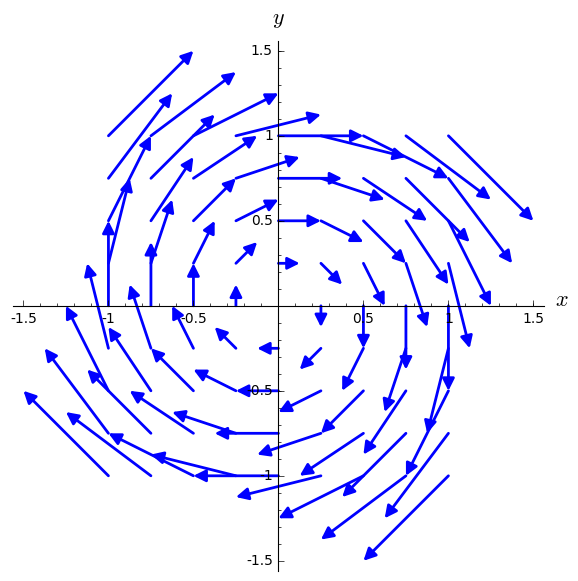

In [168]:
graph_z0 = E[3].plot(chart=stereoN, ambient_coords=(x,y),
                     fixed_coords={z: 0}, max_range=1, scale=0.5)
show(graph_z0, aspect_ratio=1)

or in the plane $y=0$:

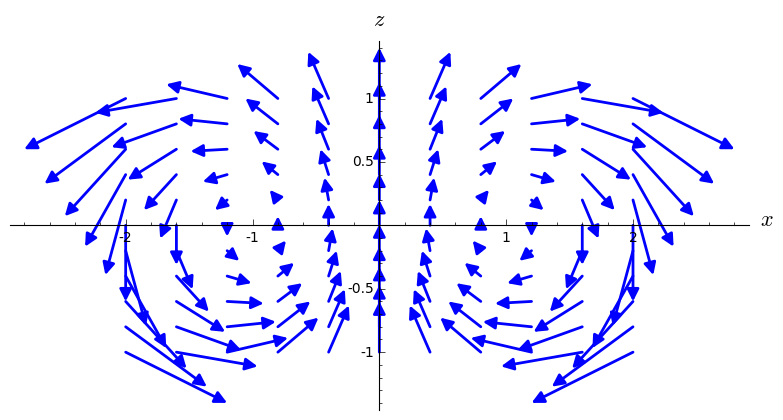

In [169]:
graph_y0 = E[3].plot(chart=stereoN, ambient_coords=(x,z),
                     fixed_coords={y: 0}, number_values=11,
                     ranges={x: (-2,2), z: (-1,1)}, scale=0.4)
show(graph_y0, aspect_ratio=1)

A 3D view of $\varepsilon_3$, in terms of the stereographic coordinates $(x,y,z)$:

In [170]:
graph = E[3].plot(chart=stereoN, max_range=1, number_values=7, 
                  scale=0.25, label_axes=False)
show(graph, viewer=viewer3D, axes_labels=['x','y','z'])

Graphics3d Object